<a href="https://colab.research.google.com/github/ravitejamanchala06/ORES5160-02/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project**

**Obesity and Income**
*******

In this project, we will look at the correlation between Obesity and Income. Along the way, we will also analyse USA median income by state, and Obesity rates in all the states. The investigation not only sheds light on overarching national correlations but also scrutinizes regional and local dynamics, providing a nuanced understanding of how income disparities may contribute to obesity prevalence.

The significance of this inquiry lies in the profound implications for public health and policy. Observing national trends allows us to discern broader patterns, potentially informing strategies to address the obesity epidemic. Simultaneously, a granular examination at the county level unravels localized dynamics, revealing the impact of income disparities on health outcomes.

Datasets Used (in order of appearance):

[USA Statewise Population and Obesity Rate](https://worldpopulationreview.com/state-rankings/obesity-rate-by-state) : JSON Format

This dataset contains state wise obesity rates.

[Income Data](https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/): Excel Format

The dataset has the income data, employment rates, for all the states and counties in USA.

[States to Regions]( https://www.kaggle.com/datasets/omer2040/usa-states-to-region?select=states.csv) : CSV Format

This dataset has States, and the division and region they belong to.

[Counties Obesity Data](https://www.countyhealthrankings.org/explore-health-rankings/county-health-rankings-model/health-factors/health-behaviors/diet-and-exercise/adult-obesity?year=2018&state=54&tab=1) : Excel Format

This website gives data for county wise obesity data for any state and year we choose.


# **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Obesity Data**

Loading the obesity dataset, where we have the obesity rate in each state. We also have columns of population of each state for some years and the population growth rate. We have 52 rows and 14 columns in our dataset.

In [2]:
state_obesity = pd.read_json('/content/obesity-rate-by-state-2023.json')
state_obesity.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,HealthiestObesityRate,ObesityRateConfidenceInterval,isTotal
0,1.0,Alabama,100.67620,5098746.0,5074296.0,5031362.0,5006199.4,4779736.0,0.00482,24450.0,0.06674,39.9,"(37.9, 41.8)",NaN
1,2.0,Alaska,1.28449,732984.0,733583.0,732923.0,730653.8,710231.0,-0.00082,-599.0,0.03204,33.5,"(31.5, 35.5)",NaN
2,4.0,Arizona,65.61541,7453517.0,7359197.0,7179943.0,7101150.4,6392017.0,0.01282,94320.0,0.16607,31.3,"(30.0, 32.6)",NaN
3,5.0,Arkansas,58.86715,3063152.0,3045637.0,3014195.0,3004367.3,2915918.0,0.00575,17515.0,0.05049,38.7,"(36.6, 40.8)",NaN
4,6.0,California,249.81347,38915693.0,39029342.0,39501653.0,39276883.3,37253956.0,-0.00291,-113649.0,0.04461,27.6,"(26.1, 29.1)",NaN


As, we have 14 columns in our dataset, which we won't be using them for our analysis. We will drop all the unnecessary columns, which will leave us with only what we require.

In [3]:
# we won't be using all the columns, so let's take only the two we need.
state_obesity = state_obesity[['state', 'HealthiestObesityRate']]
# renaming the columns
state_obesity = state_obesity.rename(columns={"state": "State", "HealthiestObesityRate": "Obesity_rate"})
state_obesity.tail()

,State,Obesity_rate
47,Washington,28.800000
48,West Virginia,40.600000
49,Wisconsin,33.900000
50,Wyoming,32.000000
51,United States,32.614705


Here, we are adding rank column in our dataset based on the obesity rate corresponding to it. It will be useful for us in understanding which states have the highest and lowest obesity rates.

In [4]:
# Creating a column to add to the dataframe. It will be the ranking of states based on Obesity ratings.
state_obesity = state_obesity.sort_values(by = 'Obesity_rate', ascending = False)
state_obesity['Obesity_Rank'] = range(1, len(state_obesity) + 1)

# Taking the top and last 10 states
first_ten_ob = state_obesity.head(10)
last_ten_ob = state_obesity.tail(10)

first_and_last_ob = pd.concat([first_ten_ob, last_ten_ob])

first_and_last_ob

,State,Obesity_rate,Obesity_Rank
48,West Virginia,40.6,1
17,Kentucky,40.3,2
0,Alabama,39.9,3
36,Oklahoma,39.4,4
24,Mississippi,39.1,5
3,Arkansas,38.7,6
18,Louisiana,38.6,7
41,South Dakota,38.4,8
35,Ohio,37.7,9
15,Iowa,36.4,10


# **Income Data**

We are loading our second dataset i.e, Income data. We have columns like State, area name, income, unemployed and employed rates for some years.

In [5]:
income = pd.read_excel('/content/Unemployment.xlsx')
income.head()

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,0,US,United States,NaN,NaN,NaN,142601576.0,136904853.0,5696723.0,4.0,...,162229903.0,153544980.0,8684923.0,5.4,164781642.0,158766998.0,6014644.0,3.7,69717.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2147173.0,2047731.0,99442.0,4.6,...,2259349.0,2183330.0,76019.0,3.4,2286028.0,2226670.0,59358.0,2.6,53990.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21861.0,20971.0,890.0,4.1,...,26545.0,25809.0,736.0,2.8,26789.0,26181.0,608.0,2.3,66444.0,123.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,69979.0,67370.0,2609.0,3.7,...,99953.0,97034.0,2919.0,2.9,102849.0,100432.0,2417.0,2.4,65658.0,121.6
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,11449.0,10812.0,637.0,5.6,...,8280.0,7821.0,459.0,5.5,8241.0,7906.0,335.0,4.1,38649.0,71.6


In [6]:
income = income[['State', 'Area_Name', 'Median_Household_Income_2021']] # Keeping only the columns we will use.

Here we are cleaning our dataset, as the area name contains both state names and county names, we are removing all county names and that leaves us with only states.

In [7]:
state_income = income[income['Area_Name'].str.contains(',') == False]
# renaming the column to make it easier to merge
state_income = state_income.rename(columns = {'State': 'Abbr','Area_Name': 'State'})
print('Shape of the data is: ', state_income.shape)
state_income.head()

Shape of the data is:  (54, 3)


,Abbr,State,Median_Household_Income_2021
0,US,United States,69717.0
1,AL,Alabama,53990.0
69,AK,Alaska,78437.0
104,AZ,Arizona,68967.0
120,AR,Arkansas,52577.0


In [8]:
state_income = state_income.sort_values(by = 'Median_Household_Income_2021', ascending = False)
# adding a rank column to this dataframe too, based on median household income
state_income['Income_Rank'] = range(1, len(state_income) + 1)
state_income.head()

,Abbr,State,Median_Household_Income_2021,Income_Rank
333,DC,District of Columbia,91072.0,1
334,DC,District of Columbia,91072.0,2
1218,MD,Maryland,90129.0,3
1243,MA,Massachusetts,89577.0,4
1809,NJ,New Jersey,89227.0,5


In [9]:
state_income.tail()

,Abbr,State,Median_Household_Income_2021,Income_Rank
120,AR,Arkansas,52577.0,50
1136,LA,Louisiana,52090.0,51
3045,WV,West Virginia,51122.0,52
1430,MS,Mississippi,48871.0,53
3198,PR,Puerto Rico,NaN,54


Here, we are creating a new dataframe which contains the top and last 10 income states

In [10]:
state_income = state_income.drop(333) # DC has duplicate values
state_income = state_income.drop(3198) # Duplicate row
first_ten_in = state_income.head(10) # top 10 highest income states
last_ten_in = state_income.tail(10) # 10 states with least incomes.

first_and_last_in = pd.concat([first_ten_in, last_ten_in])
first_and_last_in

,Abbr,State,Median_Household_Income_2021,Income_Rank
334,DC,District of Columbia,91072.0,2
1218,MD,Maryland,90129.0,3
1243,MA,Massachusetts,89577.0,4
1809,NJ,New Jersey,89227.0,5
1798,NH,New Hampshire,88268.0,6
563,HI,Hawaii,85547.0,7
196,CA,California,84831.0,8
3005,WA,Washington,84155.0,9
320,CT,Connecticut,83628.0,10
255,CO,Colorado,82228.0,11


## Regions Data

We are reading the Regions data which contains columns like state, state code, region, division.

In [11]:
states = pd.read_csv('states.csv')
states.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


# **Income vs Obesity in USA**

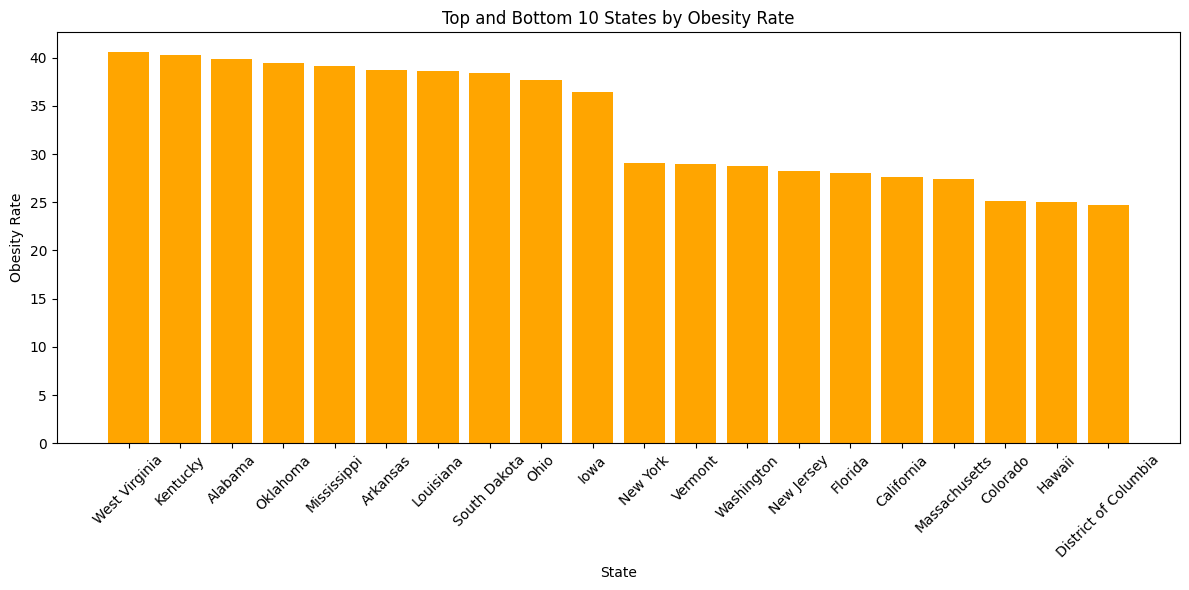

In [12]:
plt.figure(figsize=(12, 6))

plt.bar(first_and_last_ob['State'], first_and_last_ob['Obesity_rate'], color='orange')
plt.xlabel('State')
plt.ylabel('Obesity Rate')
plt.title('Top and Bottom 10 States by Obesity Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows the top 10 states and the bottom 10 states w.r.t Obesity rates.

We will compare these states with the ones in the following plot

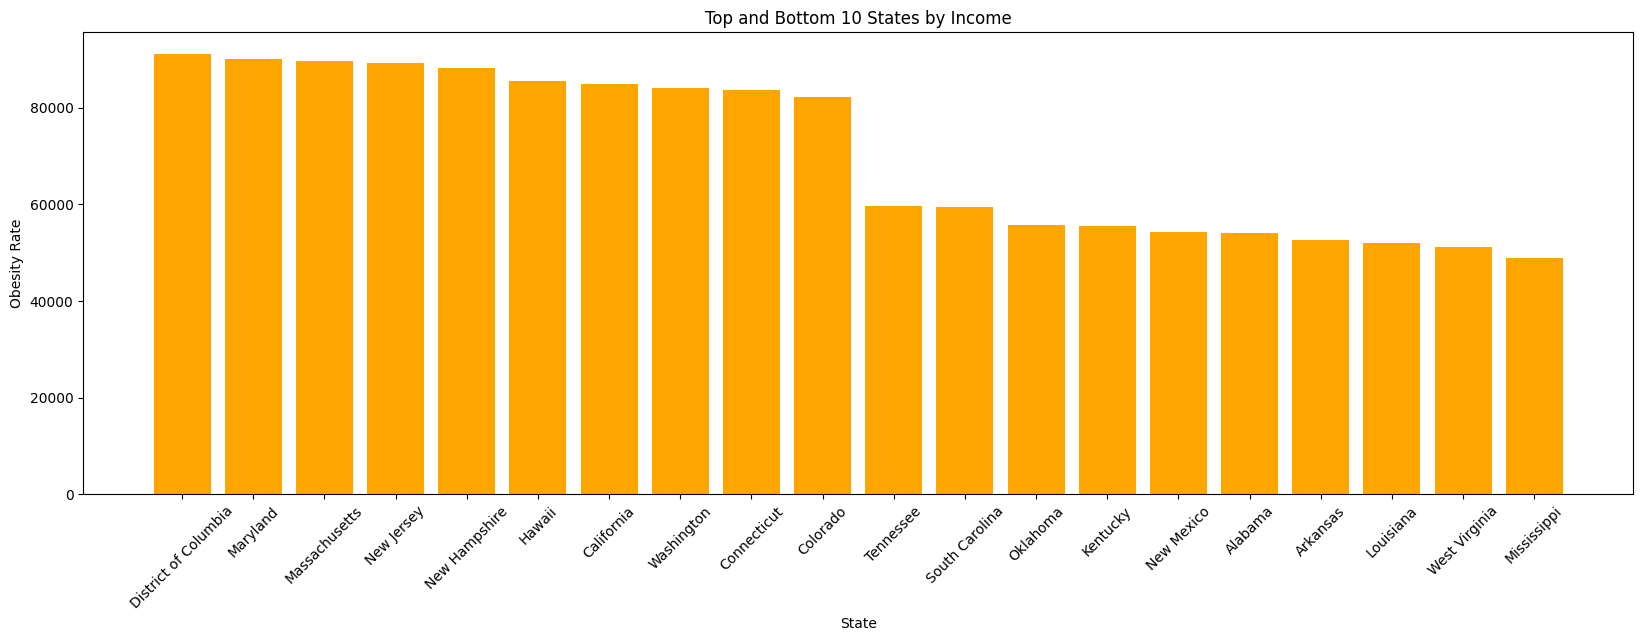

In [13]:
plt.figure(figsize=(20, 6))
plt.bar(first_and_last_in['State'], first_and_last_in['Median_Household_Income_2021'], color='orange')
plt.xlabel('State')
plt.ylabel('Obesity Rate')
plt.title('Top and Bottom 10 States by Income')
plt.xticks(rotation=45)
plt.show()

This plot shows us the top 10 and bottom 10 states with respect to income. Washington D.C has the highest income among all staes and the least in Mississippi.

### Merging both income and obesity datasets

In [14]:
# merging income and obesity
merged_df = pd.merge(state_income, state_obesity, on = 'State')
merged_df.tail(10)

,Abbr,State,Median_Household_Income_2021,Income_Rank,Obesity_rate,Obesity_Rank
42,TN,Tennessee,59698.0,44,35.0,18
43,SC,South Carolina,59447.0,45,36.1,12
44,OK,Oklahoma,55829.0,46,39.4,4
45,KY,Kentucky,55532.0,47,40.3,2
46,NM,New Mexico,54304.0,48,34.6,19
47,AL,Alabama,53990.0,49,39.9,3
48,AR,Arkansas,52577.0,50,38.7,6
49,LA,Louisiana,52090.0,51,38.6,7
50,WV,West Virginia,51122.0,52,40.6,1
51,MS,Mississippi,48871.0,53,39.1,5


Among the 10 states ranking lowest in terms of income, 7 of them are in the top 10 highest obesity effected states. So, our initial assumption of possible correlation between the two is still possible.

In [15]:
def regression_plot(df, x_axis, y_axis, x_label, y_label, plot_title):
  """
  (dataframe, column for x axis, column for y axis, label for x axis, label for y axis, Title of the plot)

  This function will draw a regression plot for the columns given
  """
  sns.set(style="dark")
  sns.regplot(x= x_axis, y= y_axis, data= df ,
              scatter_kws={'color': 'skyblue'}, line_kws={'color': 'black', 'linestyle': '--'})
  plt.title(plot_title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

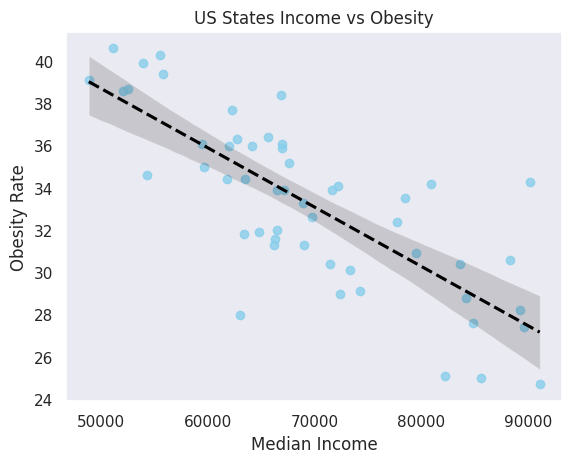

In [16]:
# using the custom function
regression_plot(merged_df, 'Median_Household_Income_2021', 'Obesity_rate', 'Median Income', 'Obesity Rate', 'US States Income vs Obesity')

In [17]:
# checking for correlation between income and obesity
merged_df['Median_Household_Income_2021'].corr(merged_df['Obesity_rate'])


-0.7778673276804923

From the plot and the correlation method, we see a significant correlation betwween obesity and income. The lower a state's income the higher chances of it being a more obesity prone state.

80% correlation is a very significant number. But again, this is not enough evidence to prove the relation.

### Merging the states dataset with the first merged datset

In [18]:
regions_df = pd.merge(merged_df, states, on = 'State')
regions_df.head()

,Abbr,State,Median_Household_Income_2021,Income_Rank,Obesity_rate,Obesity_Rank,State Code,Region,Division
0,DC,District of Columbia,91072.0,2,24.7,52,DC,South,South Atlantic
1,MD,Maryland,90129.0,3,34.3,22,MD,South,South Atlantic
2,MA,Massachusetts,89577.0,4,27.4,49,MA,Northeast,New England
3,NJ,New Jersey,89227.0,5,28.2,46,NJ,Northeast,Middle Atlantic
4,NH,New Hampshire,88268.0,6,30.6,39,NH,Northeast,New England


### Grouping by region

In [19]:
# grouping by region.
region = regions_df.groupby('Region').agg({
    'Median_Household_Income_2021': 'mean',
    'Income_Rank': 'mean',
    'Obesity_rate': 'mean',
    'Obesity_Rank': 'mean',
    'State': 'count'
}).reset_index()

region = region.rename(columns={'State': 'State_Count', 'Income_Rank': 'Avg_income_rank', 'Obesity_Rank': 'Avg_obesity_rank'})
region = region.sort_values(by = ['Avg_income_rank'])

In [20]:
region

,Region,Median_Household_Income_2021,Avg_income_rank,Obesity_rate,Avg_obesity_rank,State_Count
1,Northeast,78269.222222,15.000000,30.000000,40.666667,9
3,West,73210.461538,22.076923,30.300000,37.923077,13
0,Midwest,66542.750000,31.083333,35.425000,17.333333,12
2,South,63613.882353,36.058824,35.811765,16.529412,17


The NorthEastern states have higher Avg income and rank very low in Obesity Rankings.

As we can see from the table, As the income goes down, obesity rates go up.

### Grouping by Division

In [21]:
# grouping by divisions this time.
division = regions_df.groupby('Division').agg({
    'Median_Household_Income_2021': 'mean',
    'Income_Rank': 'mean',
    'Obesity_rate': 'mean',
    'Obesity_Rank': 'mean',
    'State': 'count'
}).reset_index()

division = division.rename(columns={'State': 'State_Count', 'Income_Rank': 'Avg_income_rank', 'Obesity_Rank': 'Avg_obesity_rank'})
division = division.sort_values(by = ['Avg_income_rank'])

In [22]:
division

,Division,Median_Household_Income_2021,Avg_income_rank,Obesity_rate,Avg_obesity_rank,State_Count
5,Pacific,80882.200000,11.800000,29.060000,42.400000,5
2,Middle Atlantic,77462.666667,15.000000,30.200000,39.333333,3
4,New England,78672.500000,15.000000,29.900000,41.333333,6
6,South Atlantic,70654.444444,27.333333,33.522222,24.777778,9
3,Mountain,68415.625000,28.500000,31.075000,35.125000,8
7,West North Central,67242.142857,30.000000,35.528571,16.714286,7
0,East North Central,65563.600000,32.600000,35.280000,18.200000,5
8,West South Central,56863.750000,43.500000,38.200000,7.500000,4
1,East South Central,54522.750000,48.250000,38.575000,7.000000,4


Similar to the regions table, we can see that as the lower income goes, the higher obesity rate goes.

# **Data for Counties income vs obesity**

## Functions for reading and cleaning the data

The function below gives us a cleaned dataframe as output, if we give the path as input.

In [23]:
def clean_obesity(path):
  """
  (path to the county obesity data)

  This function reads the excel file, and cleans it.
  """
  df = pd.read_excel(path)
  df = df[['County', 'County Value']]
  df['Obesity Rate'] = df['County Value'] * 100     # The data is in fractions, we will convert it into percentage
  df = df.drop(columns = ['County Value'])
  return df

The below function takes a dataframe and state as input, which gives us a dataframe with the county names in that state.

In [24]:
def clean_counties(df, state):
  """
  (dataframe, state the data belongs to)
  This data takes the counties data and cleans it.
  """
  df = df[df['State']== state]
  print("Shape of the data frame is : ", df.shape)
  tempstr = ' County, '+ state
  df['Area_Name'] = df['Area_Name'].str.replace(tempstr, '')
  df = df.rename(columns= {'Area_Name': 'County'})
  return df

In [25]:
def analyze_counties (df1, df2, state):
  """
  (first dataframe, second dataframe, state the data belongs to )

  This function takes 2 datasets, and the state they belong to. And gives us the correlation between
  obesity and income. Also calls the regression plot to draw a plot.
  """
  df = pd.merge(df1, df2, on = 'County')
  df = df.drop(0)
  print('Correlation between income and obesity is : ' ,df['Obesity Rate'].corr(df['Median_Household_Income_2021']))
  print()
  print()
  title = state + ' Counties Income vs Obesity'
  regression_plot(df, 'Median_Household_Income_2021', 'Obesity Rate', 'Media Income', 'Obesity Rate ',title)

## Data

Reading and cleaning all the counties data

In [26]:
wv_obesity = clean_obesity('/content/WV_obesity_2021.xlsx')
wv_obesity.head()

,County,Obesity Rate
0,West Virginia,38.0
1,Barbour,40.0
2,Berkeley,39.0
3,Boone,42.0
4,Braxton,37.0


In [27]:
wv_income = clean_counties(income, 'WV')
wv_income.head()

Shape of the data frame is :  (56, 3)


<ipython-input-24-87748607c964>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_Name'] = df['Area_Name'].str.replace(tempstr, '')


,State,County,Median_Household_Income_2021
3045,WV,West Virginia,51122.0
3046,WV,Barbour,43545.0
3047,WV,Berkeley,70893.0
3048,WV,Boone,41227.0
3049,WV,Braxton,41587.0


In [28]:
ny_obesity = clean_obesity('/content/New York Obesity 2021.xlsx')
ny_obesity.head()

,County,Obesity Rate
0,Albany,28.0
1,Allegany,37.0
2,Bronx,29.0
3,Broome,30.0
4,Cattaraugus,39.0


In [29]:
ny_income = clean_counties(income, 'NY')
ny_income.head()

Shape of the data frame is :  (63, 3)


<ipython-input-24-87748607c964>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_Name'] = df['Area_Name'].str.replace(tempstr, '')


,State,County,Median_Household_Income_2021
1865,NY,New York,74230.0
1866,NY,Albany,74512.0
1867,NY,Allegany,55320.0
1868,NY,Bronx,43143.0
1869,NY,Broome,55729.0


In [30]:
md_obesity = clean_obesity('/content/MD_obesity_2021.xlsx')
md_obesity.head()

,County,Obesity Rate
0,Maryland,32.0
1,Montgomery,22.0
2,Howard,26.0
3,Queen Anne's,28.0
4,Talbot,29.0


In [31]:
md_income = clean_counties(income, 'MD')
md_income.head()

Shape of the data frame is :  (25, 3)


<ipython-input-24-87748607c964>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_Name'] = df['Area_Name'].str.replace(tempstr, '')


,State,County,Median_Household_Income_2021
1218,MD,Maryland,90129.0
1219,MD,Allegany,49236.0
1220,MD,Anne Arundel,107281.0
1221,MD,Baltimore,80159.0
1222,MD,Calvert,117459.0


In [32]:
tx_obesity = clean_obesity('/content/Texas_obesity_2021.xlsx')
tx_obesity.head()

,County,Obesity Rate
0,Texas,31.0
1,Anderson,38.0
2,Andrews,31.0
3,Angelina,40.0
4,Aransas,38.0


In [33]:
tx_income = clean_counties(income, 'TX')
tx_income.head()

Shape of the data frame is :  (255, 3)


<ipython-input-24-87748607c964>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_Name'] = df['Area_Name'].str.replace(tempstr, '')


,State,County,Median_Household_Income_2021
2571,TX,Texas,66959.0
2572,TX,Anderson,54515.0
2573,TX,Andrews,70005.0
2574,TX,Angelina,50620.0
2575,TX,Aransas,55435.0


# **Visualizing Counties Income vs Obesity**

Correlation between income and obesity is :  -0.19424540903885407




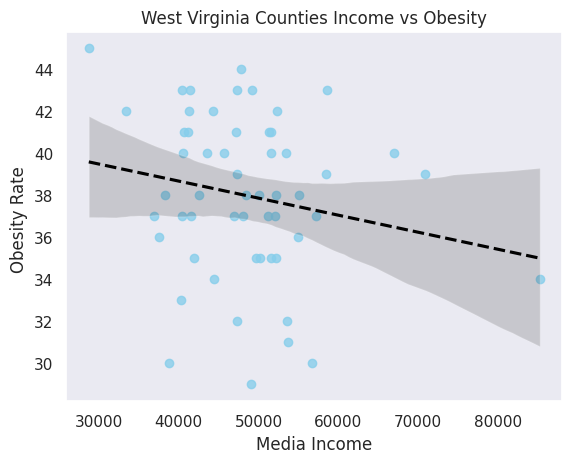

In [34]:
analyze_counties(wv_income,wv_obesity, 'West Virginia')

The plot and correlation coefficient show that the correlation between the two columns is basically non existant.

This might be because almost all the counties have similar median income.


Correlation between income and obesity is :  -0.664247746611175




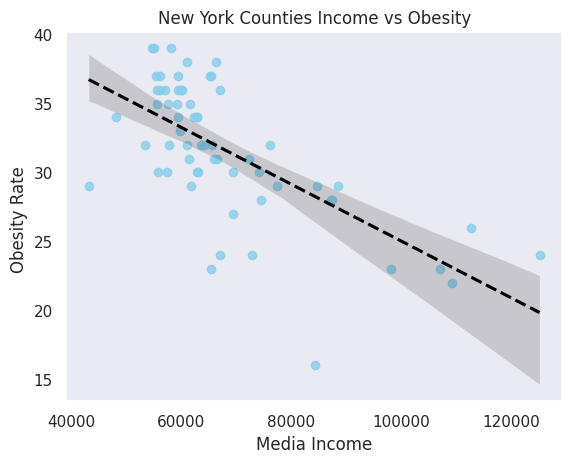

In [35]:
analyze_counties(ny_income,ny_obesity, 'New York')

New York data shows significant correlation between our two variables. Most of the data falls around the projected line

Correlation between income and obesity is :  -0.6067783696247566




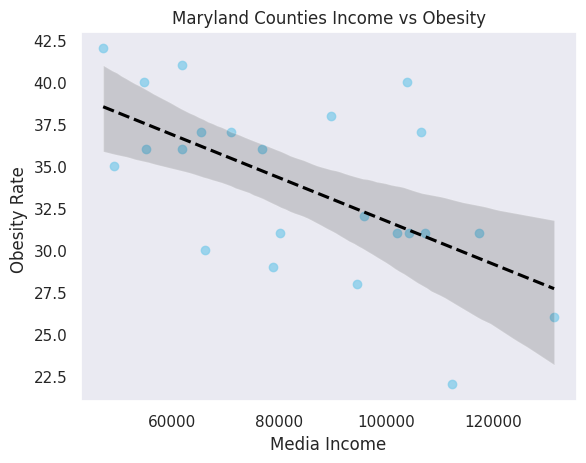

In [36]:
analyze_counties(md_income,md_obesity, 'Maryland')

Maryland has similar plot to that of New York.

Let's see a box plot to check how the income varies in the state.

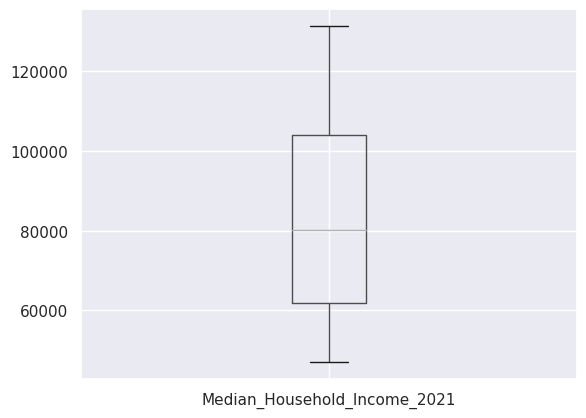

In [37]:
b_plot = md_income.boxplot(column = 'Median_Household_Income_2021')


The income varies wildly in Maryland between counties. The disparity between the richer and poorer states is large.

This may be a factor playing into the regression plot we saw above.

Correlation between income and obesity is :  0.038953253941579856




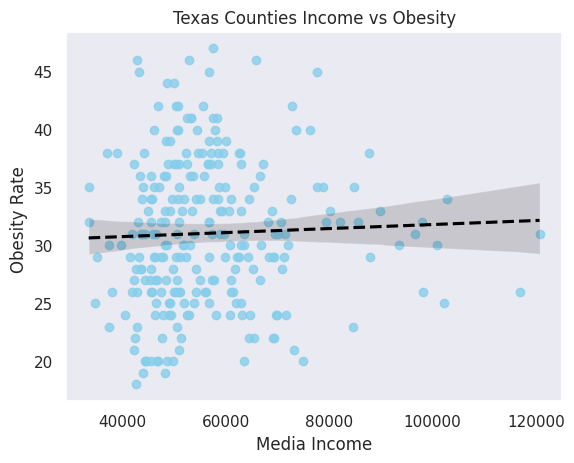

In [38]:
analyze_counties(tx_income,tx_obesity, 'Texas')

Texas like West Virginia, basically has no correlation between the two.

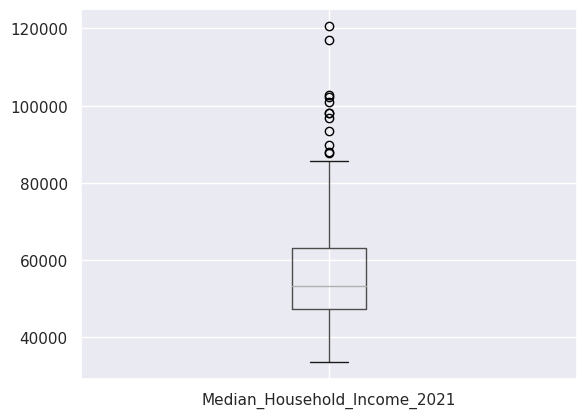

In [39]:
b_plot = tx_income.boxplot(column = 'Median_Household_Income_2021')


The box plot shows that most counties in texas fall into the same range in median household income.

# **Conclusion**


This project explored the link between obesity and income in the United States. State-level analysis revealed a strong negative correlation, with lower median incomes associated with higher obesity rates. Regional and divisional breakdowns further supported this trend. However, county-level investigations in select states showed varied correlations, emphasizing the complexity of the relationship. While some states exhibited a clear negative correlation between income and obesity at the county level, others showed little to no correlation. The project underscores the need for nuanced interpretations, cautioning against generalizing trends observed at broader geographical levels.